In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [95]:
df = pd.read_csv("//content/drive/MyDrive/datasets/Boston dataset/train.csv")

In [97]:
df.shape


(333, 15)

In [96]:
df

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [98]:
df.columns


Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [99]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [100]:
#pre-processing
df.isnull().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


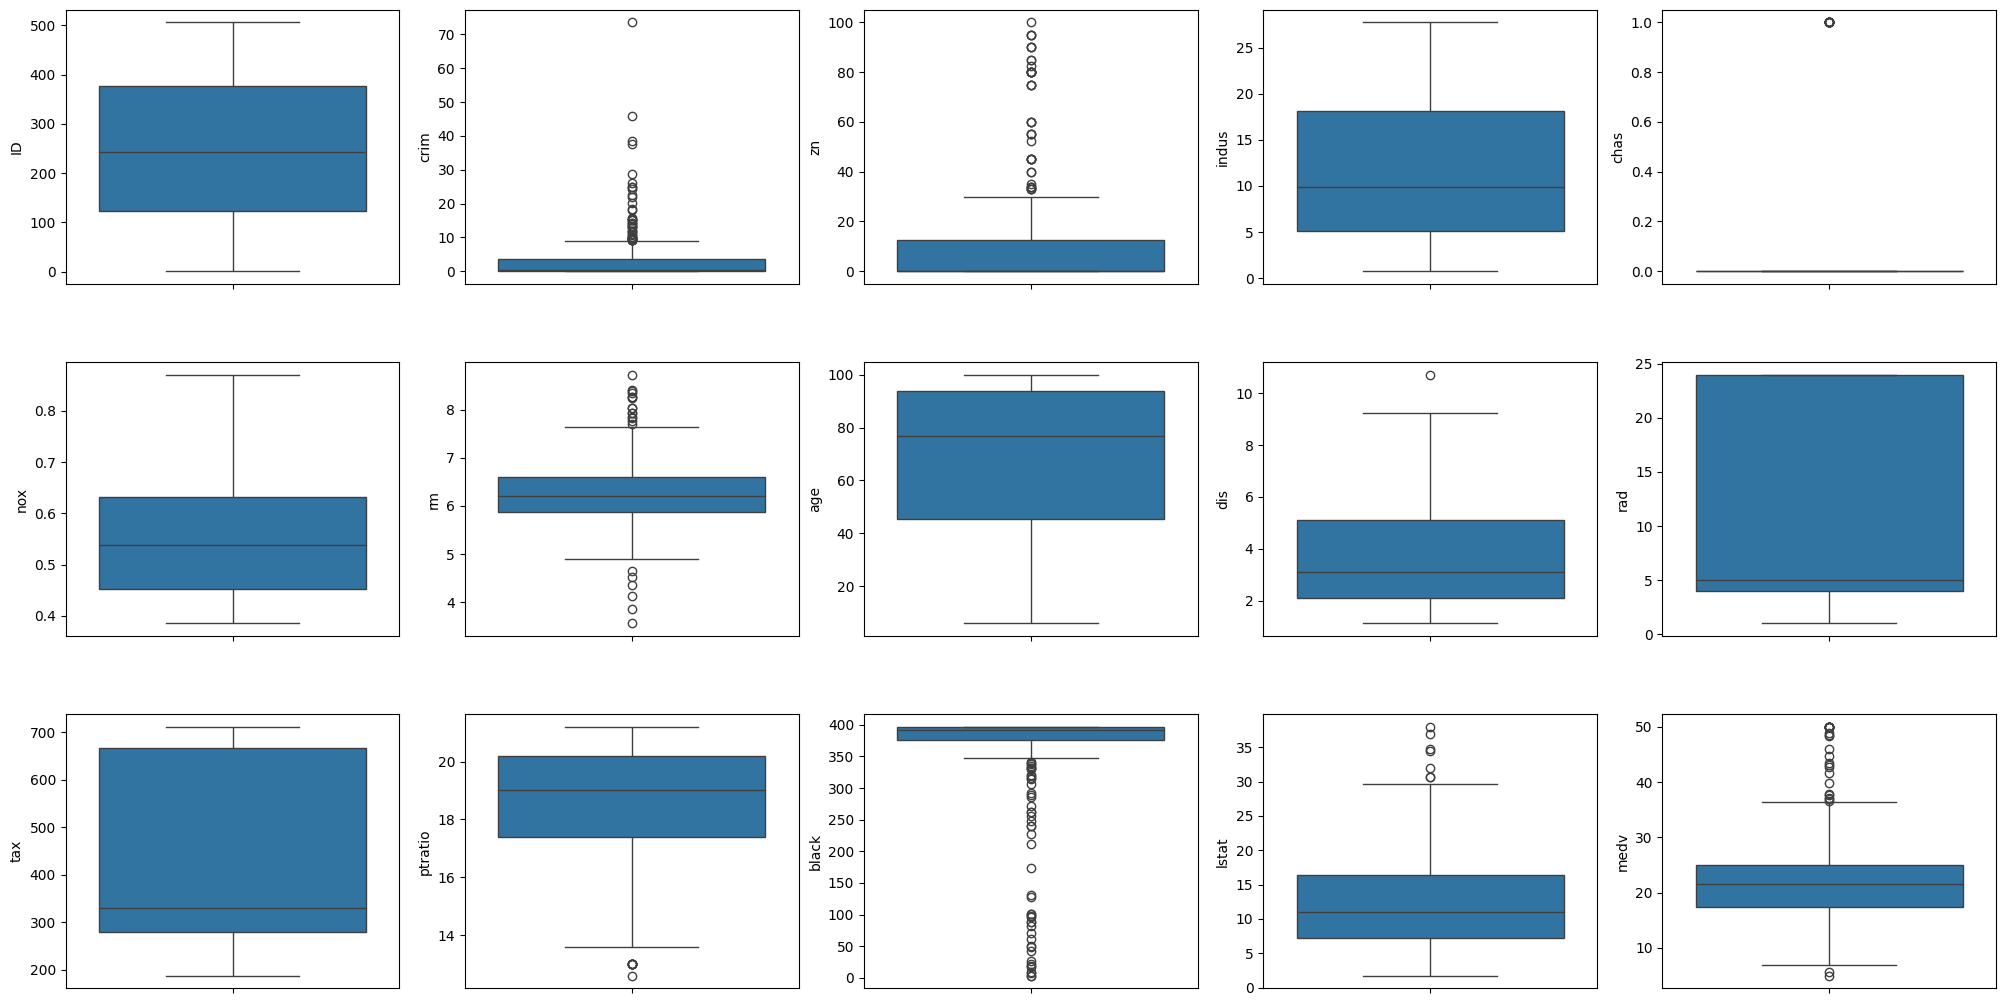

In [101]:
# create box plots
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
     sns.boxplot(y=col, data=df, ax=ax[index])
     index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: >

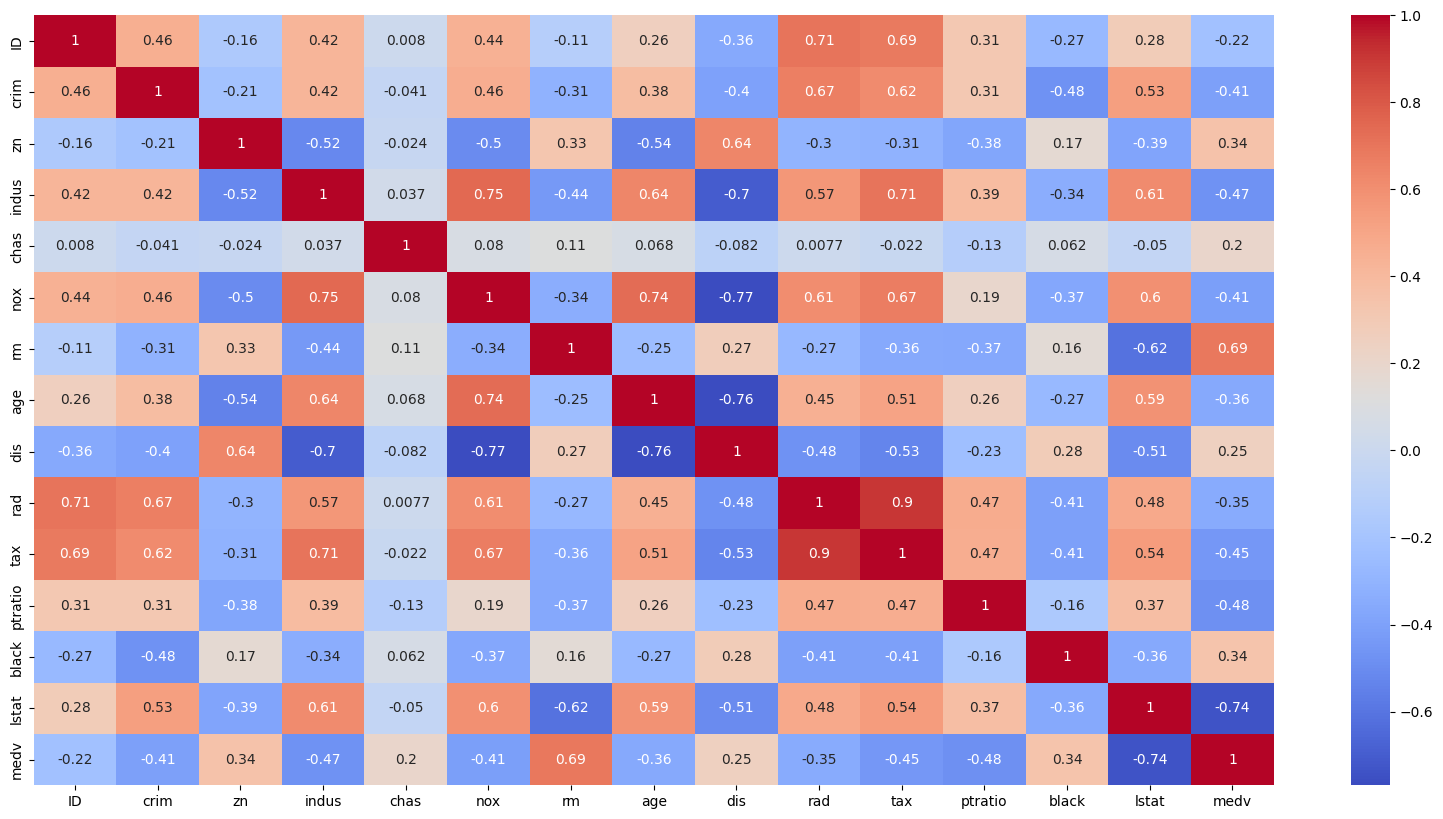

In [102]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# New Section By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

<Axes: xlabel='lstat', ylabel='medv'>

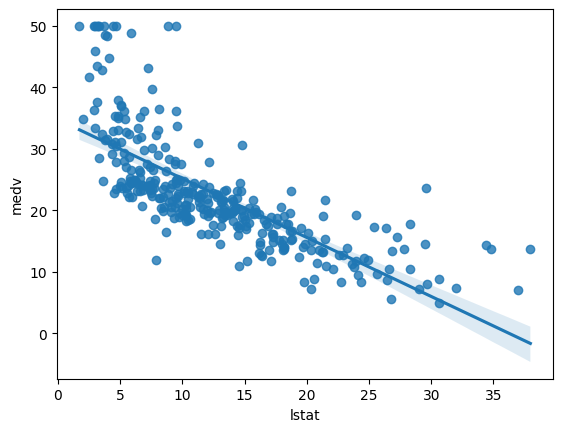

In [103]:
sns.regplot(y=df['medv'], x=df['lstat'])

<Axes: xlabel='rm', ylabel='medv'>

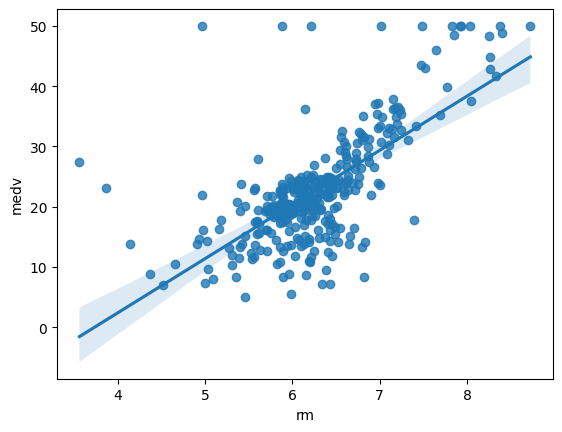

In [104]:
sns.regplot(y=df['medv'], x=df['rm'])

In [107]:
#Selecting features and dropping 'rad'beacause it is less imp.
X = df.drop(columns=['medv', 'rad'], axis=1)
Y = df['medv']

Model Training

In [108]:
# choosing  model as LR and Training model
LR_model = LinearRegression()
LR_model.fit(X,Y)

LinearRegression()

In [123]:
# Model Evaluation after Feature Selection
Y_pred = LR_model.predict(X)
# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(Y,Y_pred)
print("Mean Square Error : ", MSE)
RMSE = np.sqrt(mean_squared_error(Y,Y_pred))
print("Root Mean Square Error : ", RMSE)

Mean Square Error :  23.484154932107963
Root Mean Square Error :  4.84604528787216


In [119]:
# Prediction for Test Dataset
Test_DF = pd.read_csv('/content/drive/MyDrive/datasets/Boston dataset/test.csv')
X_test = Test_DF.drop(columns=['rad'], axis=1)
Y_test_pred = LR_model.predict(X_test)
for x, y in zip(Test_DF['ID'],Y_test_pred):
    print(x, y, sep='\t\t')

3		31.144796493851167
6		25.21893737638561
8		17.682565542272815
9		8.584395805196287
10		17.221520803717546
18		17.57603598741511
20		19.47311280062392
25		15.995930668754513
26		13.498143678212838
27		15.827926448182133
29		20.289141161659852
30		21.879507114180253
33		8.191365946297395
34		14.377738444731673
36		23.77558424733357
37		22.198590147209213
38		23.443685364034238
42		28.577046444840814
49		5.872462339088717
53		27.160937153331638
60		19.85726980412204
63		22.777522345467897
70		21.521845072740966
72		22.06845466493364
79		21.953047468780785
80		23.58304791158902
83		26.33632037333382
92		27.993438381988938
93		28.329950660706626
96		29.423021274640465
98		37.05883424820914
99		36.927860835575906
100		33.35293289959172
105		22.865689572843444
106		19.488340828669337
111		22.51776971431161
113		21.50603773949261
114		21.39681631527265
116		21.144059793999872
126		20.69954961206627
130		15.934246491543329
131		22.46805907171595
133		22.575310316672056
136		19.35318333478565

In [122]:
 print("Model Report")
    print("MSE:",mean_squared_error(y_test, Y_pred))
    print('CV Score:', cv_score)

Model Report


ValueError: Found input variables with inconsistent numbers of samples: [100, 333]

In [91]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)

    # predict the training set
    pred = model.predict(x_test)

    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 22.563507372555097
CV Score: 47.625944479715486


<Axes: title={'center': 'Model Coefficients'}>

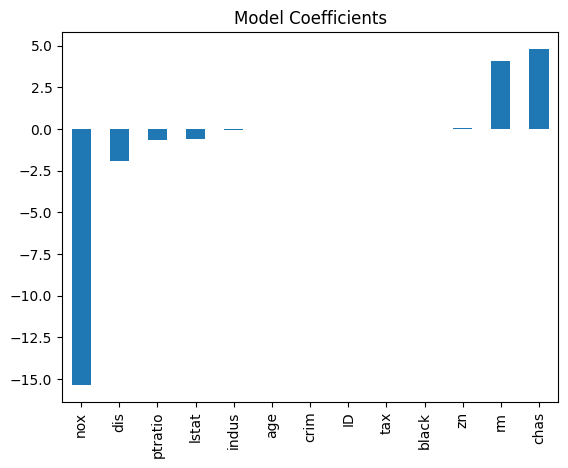

In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [ ]:
print("Intercept : ", LR.intercept_)
print("Slope : ", LR.coef_)

In [37]:
# Load the test dataset
df_test = pd.read_csv("/content/drive/MyDrive/datasets/Boston dataset/test.csv")
